<a href="https://colab.research.google.com/github/KkilianJ/Thesis/blob/main/Data_Visualization_Distribution_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/Thesis/output_tweets.csv'
df = pd.read_csv(file_path, low_memory=False)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path_short = '/content/drive/MyDrive/Thesis/short_text.csv'
df_short = pd.read_csv(file_path_short, low_memory=False)
file_path_long = '/content/drive/MyDrive/Thesis/long_text.csv'
df_long = pd.read_csv(file_path_long, low_memory=False)

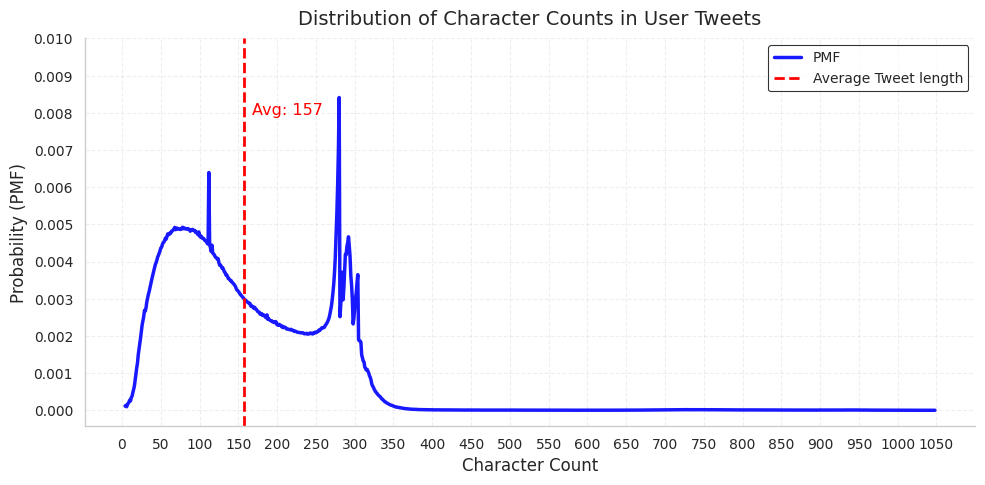

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PMF - the value of character count is discrete


x = df['char_count']

counts = pd.Series(x).value_counts().sort_index()
pmf = counts / counts.sum()
x_values = pmf.index

mean_x = np.mean(x)

closest_x = x_values[np.abs(x_values - mean_x).argmin()]
pmf_at_mean = pmf.loc[closest_x]

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

plt.figure(figsize=(10, 5))

plt.plot(x_values, pmf, color='#0000ff', linewidth=2.5, alpha=0.9, label='PMF', linestyle='-')
plt.axvline(x=mean_x, color='red', linestyle='--', linewidth=2, label='Average Tweet length')
plt.text(mean_x +10, plt.ylim()[1]*0.9, f'Avg: {int(mean_x)}', color='red')
plt.xticks(np.arange(0, max(x_values) + 50, 50), fontsize=10)

y_max = max(pmf) * 1.1
y_ticks = np.arange(0, y_max + 0.001, 0.001)
plt.yticks(y_ticks, fontsize=10)

plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Probability (PMF)', fontsize=12)
plt.title('Distribution of Character Counts in User Tweets', fontsize=14, pad=10)

plt.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')
sns.despine()
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Thesis/distribution_table_for_total_tweets", dpi=300)
plt.show()


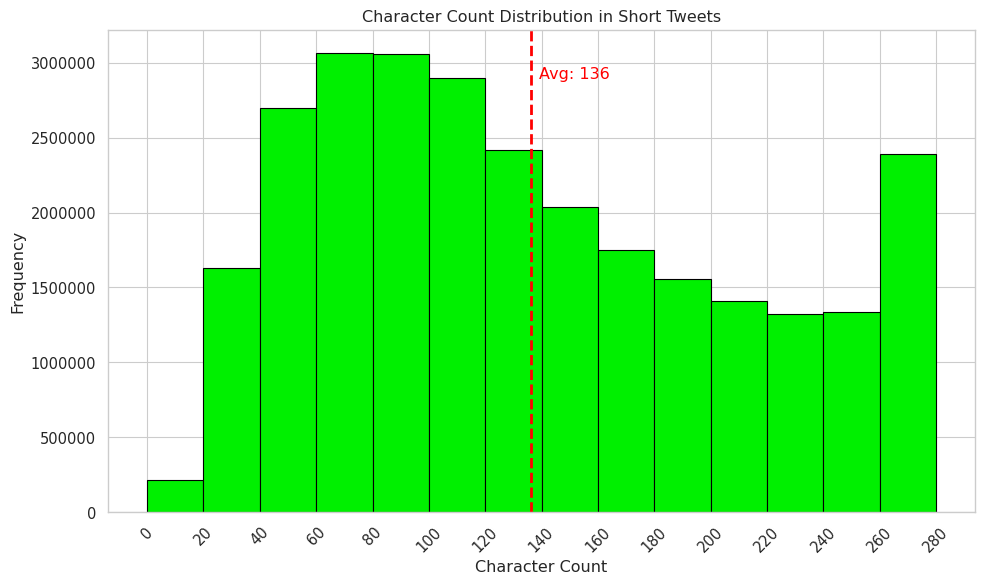

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x = df_short['char_count']
avg = np.mean(x)

bin_width = 20
bins = np.arange(0, x.max() + bin_width, bin_width)

plt.figure(figsize=(10, 6))
plt.hist(x, bins=bins, color='#00f000', edgecolor='black')

plt.axvline(avg, color='red', linestyle='--', linewidth=2)
plt.text(avg+3, plt.ylim()[1]*0.9, f'Avg: {int(avg)}', color='red')

plt.xticks(bins, rotation=45)

plt.ticklabel_format(axis='y', style='plain')

plt.ylabel('Frequency')
plt.xlabel('Character Count')
plt.title('Character Count Distribution in Short Tweets')

plt.tight_layout()
plt.show()


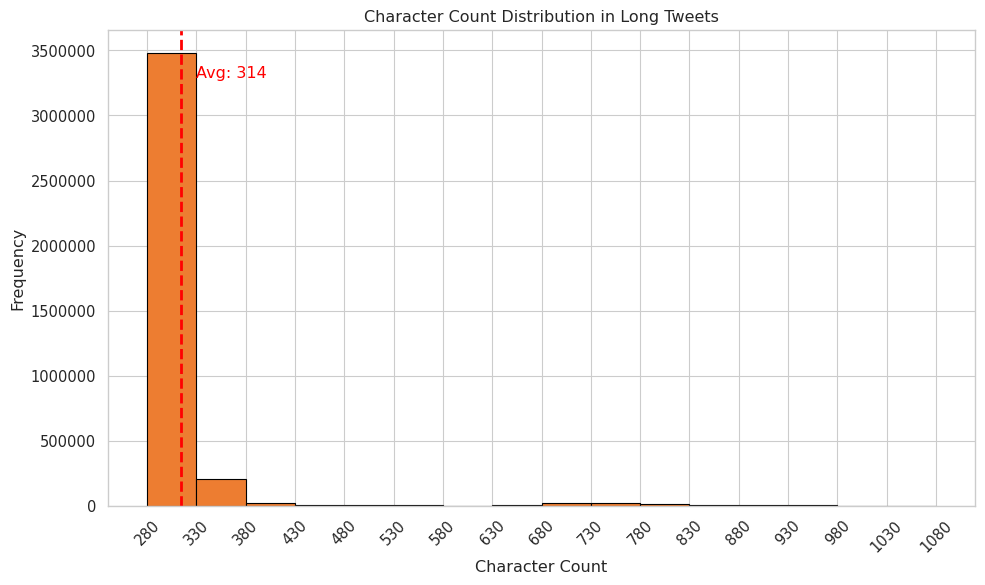

In [74]:
import matplotlib.pyplot as plt
import numpy as np

x = df_long['char_count']
avg = np.mean(x)

bin_width = 50
bins = np.arange(280, x.max() + bin_width, bin_width)

plt.figure(figsize=(10, 6))
plt.hist(x, bins=bins, color='#ed7d31', edgecolor='black')

plt.axvline(avg, color='red', linestyle='--', linewidth=2)
plt.text(avg +15, plt.ylim()[1]*0.9, f'Avg: {int(avg)}', color='red')

plt.xticks(bins, rotation=45)

plt.ticklabel_format(axis='y', style='plain')

plt.ylabel('Frequency')
plt.xlabel('Character Count')
plt.title('Character Count Distribution in Long Tweets')

plt.tight_layout()
plt.show()